In [16]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://sports.daum.net/record/epl/person?season=20222023'
res = requests.get(url)

soup = BeautifulSoup(res.text, 'html.parser')

list = soup.select('.tbody')
list

[]

In [18]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://sports.news.naver.com/wfootball/record/index'
res = requests.get(url)

soup = BeautifulSoup(res.text, 'html.parser')

list = soup.find('tbody')
list

In [101]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import re

cd = webdriver.Chrome()

url = 'https://sports.daum.net/record/epl/person?season=20222023'

res = cd.get(url)

soup = BeautifulSoup(cd.page_source, 'html.parser')

list = soup.find('tbody')
list_tr = list.find_all('tr')


football = []

for tr in list_tr:
    rank = tr.select_one('.td_rank').text
    name = tr.select_one('.td_name').text
    name2 = name.strip()
    team = tr.select_one('.td_team').text
    gp = tr.select_one('td:nth-child(4)').text 
    gf = tr.select_one('.selected_on').text
    ast = tr.select_one('td:nth-child(6)').text
    opts = tr.select_one('td:nth-child(7)').text
    sht = tr.select_one('td:nth-child(8)').text
    sog = tr.select_one('td:nth-child(9)').text
    fo = tr.select_one('td:nth-child(10)').text
    yel = tr.select_one('td:nth-child(11)').text
    red = tr.select_one('td:nth-child(12)').text
    off = tr.select_one('td:nth-child(13)').text
    football.append([rank, name2, team, gp, gf, ast, opts, sht, sog, fo, yel, red, off])
    
df = pd.DataFrame(football, columns=['순위', '선수', '팀', '경기', '득점', '도움', '공격포인트', '슈팅', '유효슈팅', '파울', '경고', '퇴장', '오프사이드'])
df.to_csv('football_ranking.csv', index=False, encoding='utf-8')

['맨시티' '토트넘' '브렌트포드' '리버풀' '뉴캐슬' '맨유' '아스널' '애스턴 빌라' '풀럼' '리즈' '레스터'
 '노팅엄 포레스트' '브라이튼' '크리스탈 팰리스' '사우샘프턴' '웨스트햄' '첼시' '본머스' '에버턴' '울버햄튼']


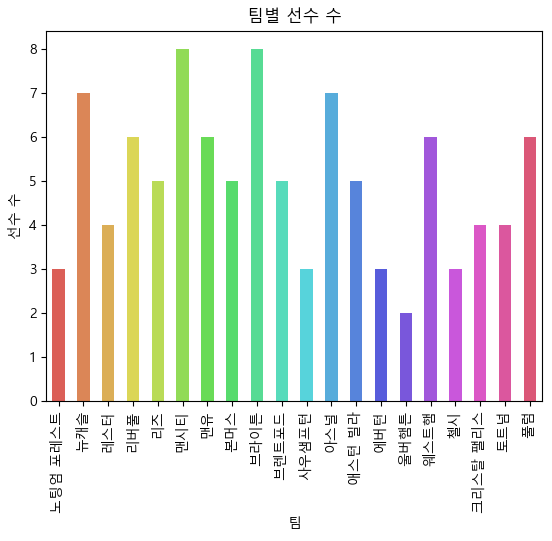

In [107]:
import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

df = pd.read_csv('football_ranking.csv', encoding='utf-8')
df.head(10)

team = df["팀"].unique()
print(team)
len(team)

team_counts = df.groupby('팀').size()
colours = sns.color_palette('hls', len(team_counts))

team_counts.plot(kind='bar', color=colours)
plt.title('팀별 선수 수')
plt.xlabel('팀')
plt.ylabel('선수 수')

plt.show()